In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import enchant
from enchant.checker import SpellChecker

In [61]:
df = pd.read_csv('train.csv')
df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [62]:
targets = df.columns.difference(['text_id', 'full_text']).to_list()
df[targets].corr()

,cohesion,conventions,grammar,phraseology,syntax,vocabulary
cohesion,1.000000,0.666151,0.638689,0.690058,0.695459,0.666151
conventions,0.666151,1.000000,0.673301,0.666842,0.700025,0.664292
grammar,0.638689,0.673301,1.000000,0.719746,0.709525,0.654852
phraseology,0.690058,0.666842,0.719746,1.000000,0.725467,0.735261
syntax,0.695459,0.700025,0.709525,0.725467,1.000000,0.680562
vocabulary,0.666151,0.664292,0.654852,0.735261,0.680562,1.000000


In [63]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

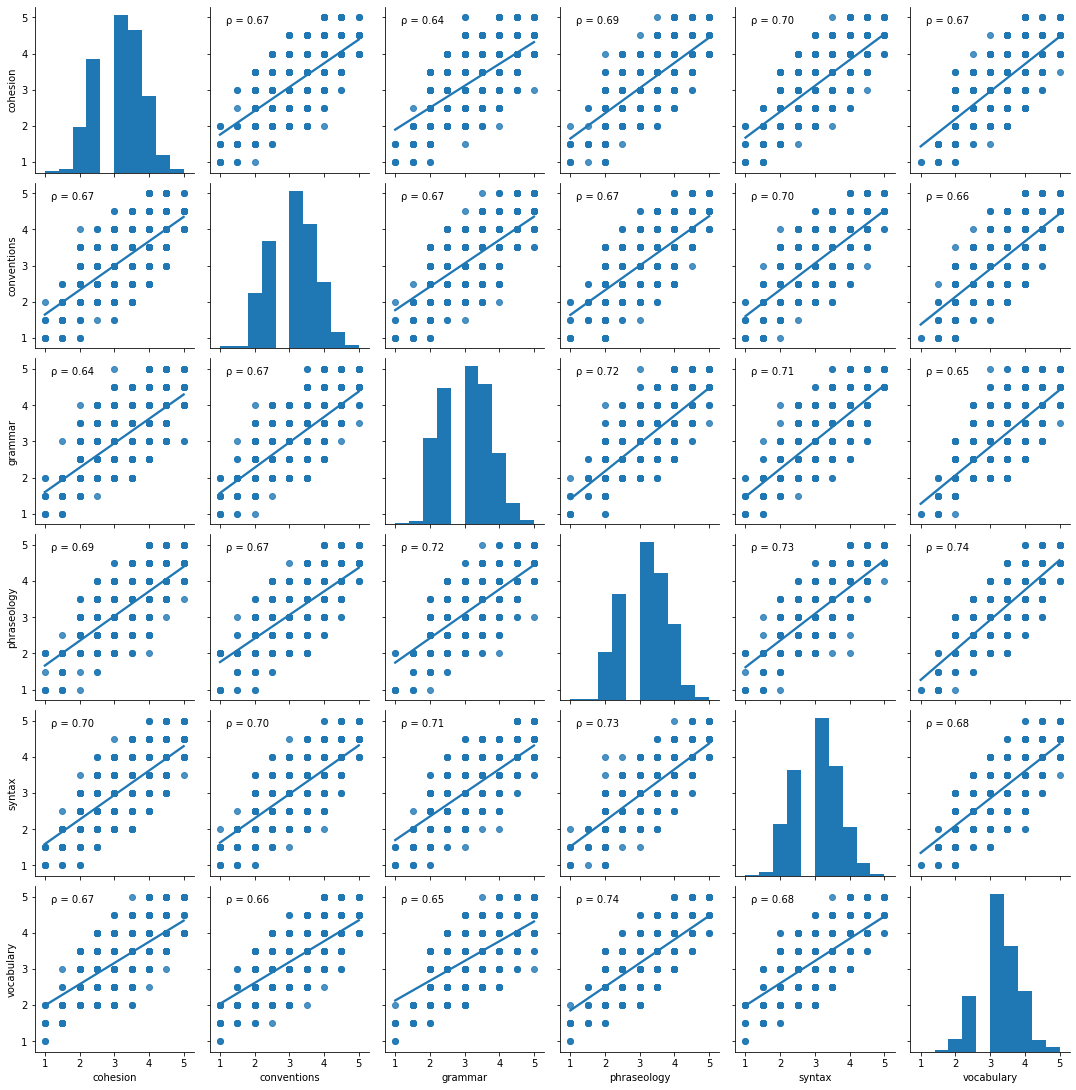

In [64]:
g = sns.pairplot(df[targets], kind='reg')
g.map_offdiag(corrfunc)

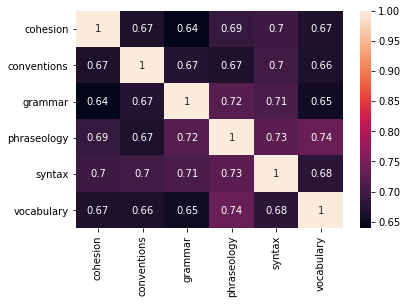

In [65]:
sns.heatmap(df[targets].corr(), annot=True)

In [66]:
df['text_len'] = df.full_text.apply(lambda x: len(x))

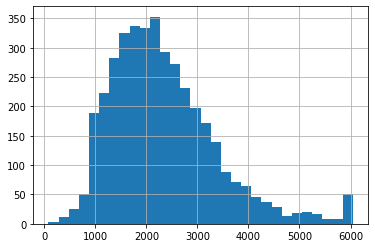

In [67]:
df.text_len.hist(bins=30)

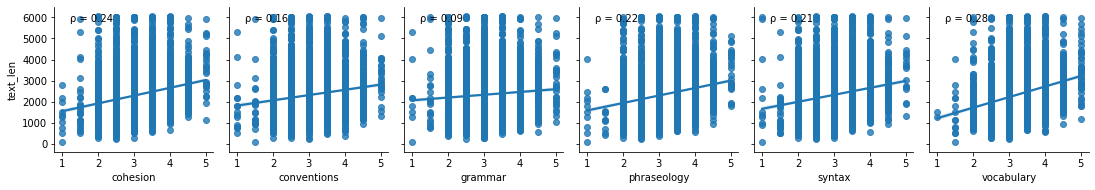

In [68]:
g = sns.pairplot(data=df, x_vars=targets, y_vars='text_len', kind='reg')
g.map(corrfunc)

In [69]:
import readability

In [70]:
results = readability.getmeasures(df.full_text[0], lang='en')
print(results['readability grades']['ARI'])

30.99875


In [71]:
results

OrderedDict([('readability grades',
              OrderedDict([('Kincaid', 24.810606060606066),
                           ('ARI', 30.99875),
                           ('Coleman-Liau', 8.005289253787883),
                           ('FleschReadingEase', 34.735909090909104),
                           ('GunningFogIndex', 28.21818181818182),
                           ('LIX', 78.12121212121212),
                           ('SMOGIndex', 12.486832980505138),
                           ('RIX', 8.0),
                           ('DaleChallIndex', 9.48195606060606)])),
             ('sentence info',
              OrderedDict([('characters_per_word', 4.125),
                           ('syll_per_word', 1.2424242424242424),
                           ('words_per_sentence', 66.0),
                           ('sentences_per_paragraph', 1.0),
                           ('type_token_ratio', 0.5037878787878788),
                           ('characters', 1089),
                           ('syllables'

In [72]:
def text_preprocess(text: str):
    text = text.strip()
    
    # new paragraph starts with \n\n
    # readability also requires each sentence to end with \n
    paragraphs = [p.strip().replace('. ', '.\n').replace('? ', '?\n').replace('! ', '!\n') for p in text.split('\n\n')]
    
    return "\n\n".join(paragraphs)

In [73]:
print(df.full_text[0])

I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.

The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.

most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a

In [74]:
print(text_preprocess(df.full_text[0]))

I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair.
taking only classes helps them because at there house they'll be pay more attention.
they will be comfortable at home.

The hardest part of school is getting ready.
you wake up go brush your teeth and go to your closet and look at your cloths.
after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain.
Then you'll have to change.
with the online classes you can wear anything and stay home and you wont need to stress about what to wear.

most students usually take showers before school.
they either take it before they sleep or when they wake up.
some students do both to smell good.
that causes them do miss the bus and effects on there lesson time cause they come late to school.
when u have online classes u wont need to miss lessons cause you can get everything set up and go take a

In [75]:
df['full_text'] = df['full_text'].apply(text_preprocess)

In [76]:
results = readability.getmeasures(df.full_text[0], lang='en')
print(results['readability grades']['ARI'])

5.332083333333333


In [77]:
results

OrderedDict([('readability grades',
              OrderedDict([('Kincaid', 4.790606060606063),
                           ('ARI', 5.332083333333333),
                           ('Coleman-Liau', 6.436266829545456),
                           ('FleschReadingEase', 86.83924242424243),
                           ('GunningFogIndex', 7.684848484848485),
                           ('LIX', 26.78787878787879),
                           ('SMOGIndex', 7.47213595499958),
                           ('RIX', 1.7777777777777777),
                           ('DaleChallIndex', 6.935822727272727)])),
             ('sentence info',
              OrderedDict([('characters_per_word', 4.125),
                           ('syll_per_word', 1.2424242424242424),
                           ('words_per_sentence', 14.666666666666666),
                           ('sentences_per_paragraph', 4.5),
                           ('type_token_ratio', 0.5037878787878788),
                           ('characters', 1089),
    

We would like to add these results as features in out dataframe. We cannot use `merge=True` because `word usage` and `sentence beginnings` have same keys which overlap each other when `merge=True`

In [78]:
from collections import OrderedDict

In [79]:
def flatten_readability(r: OrderedDict):
    out = {}
    for k, group in r.items():
        prefix = {'readability grades': '',
                  'sentence info': '',
                  'word usage': 'wu_',
                  'sentence beginnings': 'sb_'}[k]
        for var_name, value in group.items():
            out[prefix + var_name] = value
    return out

In [80]:
flatten_readability(results)

{'Kincaid': 4.790606060606063,
 'ARI': 5.332083333333333,
 'Coleman-Liau': 6.436266829545456,
 'FleschReadingEase': 86.83924242424243,
 'GunningFogIndex': 7.684848484848485,
 'LIX': 26.78787878787879,
 'SMOGIndex': 7.47213595499958,
 'RIX': 1.7777777777777777,
 'DaleChallIndex': 6.935822727272727,
 'characters_per_word': 4.125,
 'syll_per_word': 1.2424242424242424,
 'words_per_sentence': 14.666666666666666,
 'sentences_per_paragraph': 4.5,
 'type_token_ratio': 0.5037878787878788,
 'characters': 1089,
 'syllables': 328,
 'words': 264,
 'wordtypes': 133,
 'sentences': 18,
 'paragraphs': 4,
 'long_words': 32,
 'complex_words': 12,
 'complex_words_dc': 43,
 'wu_tobeverb': 5,
 'wu_auxverb': 7,
 'wu_conjunction': 16,
 'wu_pronoun': 36,
 'wu_preposition': 35,
 'wu_nominalization': 2,
 'sb_pronoun': 7,
 'sb_interrogative': 2,
 'sb_article': 1,
 'sb_subordination': 1,
 'sb_conjunction': 0,
 'sb_preposition': 2}

In [81]:
applied_df = df[['full_text']].apply(lambda row:
                                    flatten_readability(
                                        readability.getmeasures(row[0], lang='en')),
                                axis='columns',
                                result_type='expand')

In [82]:
flatten_readability(readability.getmeasures(df.full_text[0], lang='en'))

{'Kincaid': 4.790606060606063,
 'ARI': 5.332083333333333,
 'Coleman-Liau': 6.436266829545456,
 'FleschReadingEase': 86.83924242424243,
 'GunningFogIndex': 7.684848484848485,
 'LIX': 26.78787878787879,
 'SMOGIndex': 7.47213595499958,
 'RIX': 1.7777777777777777,
 'DaleChallIndex': 6.935822727272727,
 'characters_per_word': 4.125,
 'syll_per_word': 1.2424242424242424,
 'words_per_sentence': 14.666666666666666,
 'sentences_per_paragraph': 4.5,
 'type_token_ratio': 0.5037878787878788,
 'characters': 1089,
 'syllables': 328,
 'words': 264,
 'wordtypes': 133,
 'sentences': 18,
 'paragraphs': 4,
 'long_words': 32,
 'complex_words': 12,
 'complex_words_dc': 43,
 'wu_tobeverb': 5,
 'wu_auxverb': 7,
 'wu_conjunction': 16,
 'wu_pronoun': 36,
 'wu_preposition': 35,
 'wu_nominalization': 2,
 'sb_pronoun': 7,
 'sb_interrogative': 2,
 'sb_article': 1,
 'sb_subordination': 1,
 'sb_conjunction': 0,
 'sb_preposition': 2}

In [83]:
applied_df

,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,characters_per_word,...,wu_conjunction,wu_pronoun,wu_preposition,wu_nominalization,sb_pronoun,sb_interrogative,sb_article,sb_subordination,sb_conjunction,sb_preposition
0,4.790606,5.332083,6.436267,86.839242,7.684848,26.787879,7.472136,1.777778,6.935823,4.125000,...,16.0,36.0,35.0,2.0,7.0,2.0,1.0,1.0,0.0,2.0
1,11.696642,13.571250,6.100416,70.870560,16.161194,47.119403,11.329166,4.562500,6.535376,3.875000,...,32.0,98.0,67.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0
2,4.790455,5.474455,5.693801,90.105682,9.630303,28.015152,9.123724,1.900000,8.426324,3.960606,...,13.0,47.0,38.0,0.0,2.0,2.0,2.0,10.0,0.0,0.0
3,6.741270,8.570397,7.134105,84.134286,10.304762,34.888889,8.477226,2.916667,7.476857,4.140212,...,30.0,145.0,89.0,4.0,3.0,0.0,4.0,3.0,2.0,5.0
4,29.403504,36.772308,7.791572,23.180385,32.225641,90.820513,10.745967,10.000000,9.799574,4.076923,...,6.0,33.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,10.533695,11.906049,8.696697,65.086704,14.250918,45.124501,11.783101,5.000000,9.139033,4.363128,...,12.0,27.0,16.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0
3907,10.535422,12.699337,9.503051,65.639752,13.703195,48.421078,11.062258,5.833333,8.783379,4.497854,...,14.0,27.0,80.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0
3908,10.977563,13.306535,6.441473,74.022251,14.494402,45.116313,9.123724,4.125000,7.619945,3.938224,...,7.0,44.0,30.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
3909,10.364507,12.819398,8.821978,69.406584,13.700882,43.308082,10.539370,4.368421,8.672654,4.371869,...,14.0,90.0,59.0,15.0,5.0,0.0,1.0,2.0,0.0,4.0


In [84]:
large_df = pd.concat([df, applied_df], axis='columns')

add number of misspelled words as a feature

In [85]:
def misspelled_count(text):
    chkr = SpellChecker("en_US")
    chkr.set_text(text)
    return len(list(chkr))

In [86]:
large_df['misspelled_count'] = large_df['full_text'].apply(misspelled_count)

In [87]:
large_df['misspelled_ratio'] = large_df['misspelled_count'] / large_df['words']

### ABDALLAH: Let's add this checker which checks both spelling and grammar mistakes.

In [88]:
import language_tool_python

In [89]:
tool = language_tool_python.LanguageTool('en-US')

In [90]:
def gram_err_count(text):
    chkr = list(tool.check(text))
    return len([chkr[i] for i in range(len(chkr)) if chkr[i].category == 'GRAMMAR'])

In [91]:
def spell_err_count(text):
    chkr = list(tool.check(text))
    return len([chkr[i] for i in range(len(chkr)) if chkr[i].category == 'TYPOS'])

In [92]:
def gram_spell_err_count(text):
    chkr = list(tool.check(text))
    return len(chkr)

In [93]:
large_df['gram_err_count'] = large_df['full_text'].apply(gram_err_count)

In [94]:
large_df['gram_err_ratio'] = large_df['gram_err_count'] / large_df['words']

In [95]:
large_df['spell_err_count'] = large_df['full_text'].apply(spell_err_count)

In [96]:
large_df['spell_err_ratio'] = large_df['spell_err_count'] / large_df['words']

In [97]:
large_df['gram_spell_err_count'] = large_df['full_text'].apply(gram_spell_err_count)

In [98]:
large_df['gram_spell_err_ratio'] = large_df['gram_spell_err_count'] / large_df['words']

In [99]:
for col_name in ['wordtypes',
                 'long_words',
                 'complex_words',
                 'complex_words_dc',
                 'wu_tobeverb',
                 'wu_auxverb',
                 'wu_conjunction',
                 'wu_pronoun',
                 'wu_preposition',
                 'wu_nominalization',]:
    large_df[col_name + '_ratio'] = large_df[col_name] / large_df['words']
for col_name in ['sb_pronoun',
                 'sb_interrogative',
                 'sb_article',
                 'sb_subordination',
                 'sb_conjunction',
                 'sb_preposition',]:
    large_df[col_name + '_ratio'] = large_df[col_name] / large_df['sentences']

In [100]:
features = large_df.columns[8:].to_list()

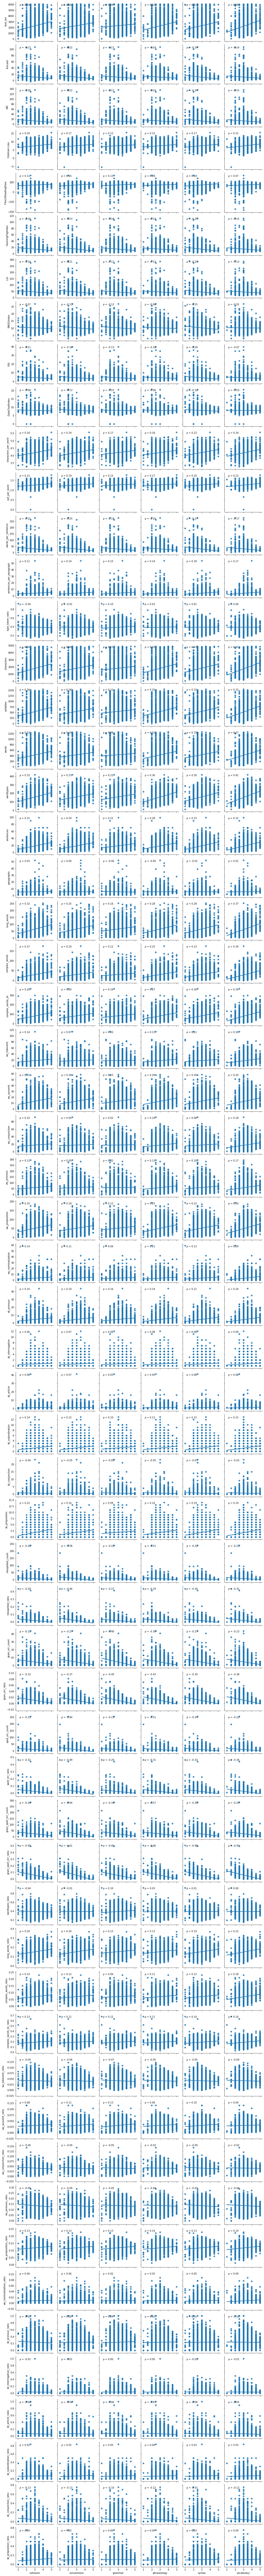

In [101]:
g = sns.pairplot(large_df, x_vars=targets, y_vars=features, kind='reg')
g.map(corrfunc)

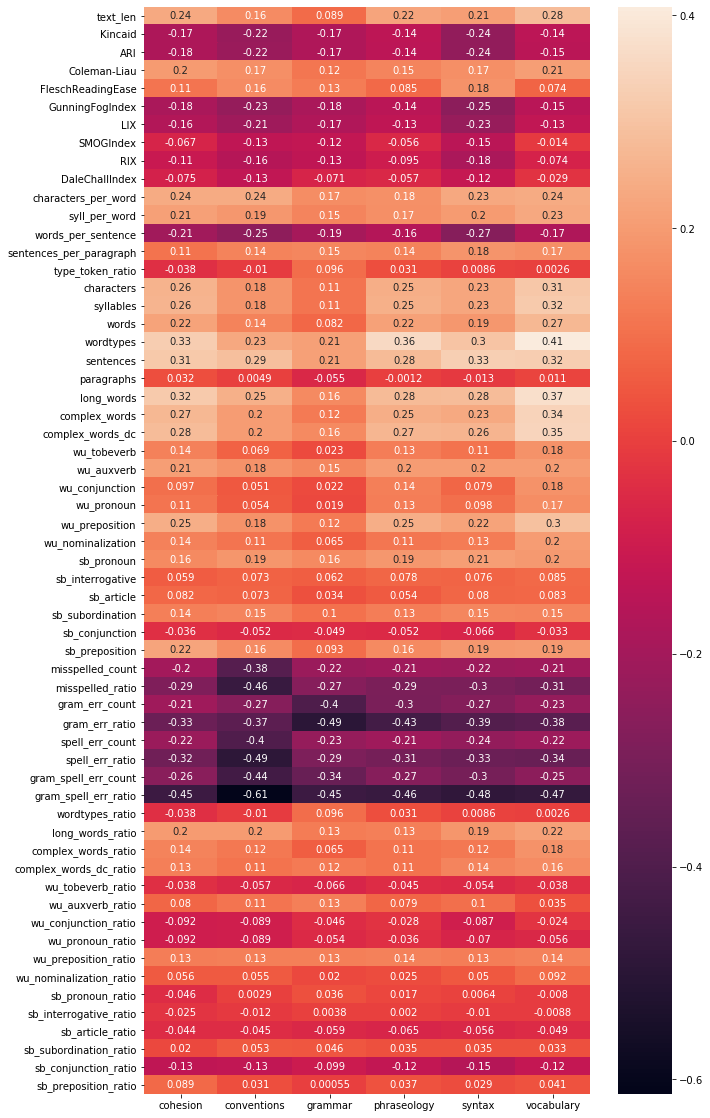

In [102]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.heatmap(large_df[targets + features].corr().iloc[len(targets):, :len(targets)], annot=True, ax=ax)

In [103]:
vocab_feature_corr = np.abs(large_df[targets + features].corr()).iloc[len(targets):, :len(targets)]['vocabulary'].sort_values(ascending=False)
vocab_feature_corr

gram_spell_err_ratio       0.473070
wordtypes                  0.408069
gram_err_ratio             0.376512
long_words                 0.373752
complex_words_dc           0.347111
complex_words              0.340330
spell_err_ratio            0.338267
sentences                  0.324700
syllables                  0.316876
misspelled_ratio           0.312748
characters                 0.312091
wu_preposition             0.295651
text_len                   0.281801
words                      0.271562
gram_spell_err_count       0.251961
characters_per_word        0.239811
gram_err_count             0.232775
syll_per_word              0.230541
spell_err_count            0.217295
long_words_ratio           0.216356
misspelled_count           0.209104
Coleman-Liau               0.207585
wu_auxverb                 0.204408
wu_nominalization          0.202293
sb_pronoun                 0.196027
sb_preposition             0.194159
wu_conjunction             0.180480
wu_tobeverb                0

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [105]:
def MCRMSE(a, b):
    return (((a - b)**2).mean(axis=0)**0.5).mean()
from sklearn.metrics import make_scorer
mcrmse_score = make_scorer(MCRMSE, greater_is_better=False) #same as scoring='neg_root_mean_squared_error'

In [106]:
scores = {}

In [107]:
n_splits = 5

In [108]:
score = cross_val_score(estimator=LinearRegression(),
                        X=large_df[features],
                        y=large_df[targets],
                        scoring='neg_root_mean_squared_error',
                        cv=n_splits,)

In [109]:
score.mean()

-0.5150826444504139

In [110]:
scores['linreg'] = score.mean()

In [111]:
score = cross_val_score(estimator=make_pipeline(Normalizer(), LinearRegression()),
                        X=large_df[features],
                        y=large_df[targets],
                        scoring='neg_root_mean_squared_error',
                        cv=n_splits,)

In [112]:
score.mean()

-0.5343180483592668

In [113]:
scores['norm_linreg'] = score.mean()

In [114]:
score = cross_val_score(estimator=make_pipeline(StandardScaler(), LinearRegression()),
                        X=large_df[features],
                        y=large_df[targets],
                        scoring='neg_root_mean_squared_error',
                        cv=n_splits,)

In [115]:
score.mean()

-0.5160151745700173

In [116]:
scores['std_linreg'] = score.mean()

In [117]:
from sklearn.linear_model import ElasticNet

In [118]:
gs_elastic = GridSearchCV(estimator=Pipeline([('std', StandardScaler()),
                                              ('en', ElasticNet(random_state=42, max_iter=2000))]),
                     param_grid={"en__alpha": [0.1, 1, 10], 'en__l1_ratio':[0, 0.25, 0.5, 0.75, 1]},
                     scoring='neg_root_mean_squared_error',
                     cv=n_splits)
gs_elastic.fit(X=large_df[features], y=large_df[targets])

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.639e+02, tolerance: 1.386e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.899e+02, tolerance: 1.397e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.201e+02, tolerance: 1.337e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.054e+02, tolerance: 1.308e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.064e+02, tolerance: 1.386e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.389e+02, tolerance: 1.397e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.736e+02, tolerance: 1.337e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.518e+02, tolerance: 1.308e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.080e+02, tolerance: 1.386e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.824e+02, tolerance: 1.397e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.882e+02, tolerance: 1.337e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.644e+02, tolerance: 1.308e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.788e+02, tolerance: 1.716e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\alsha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.019e+02, tolerance: 1.763e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('en',
                                        ElasticNet(max_iter=2000,
                                                   random_state=42))]),
             param_grid={'en__alpha': [0.1, 1, 10],
                         'en__l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             scoring='neg_root_mean_squared_error')

In [119]:
gs_elastic.best_estimator_

Pipeline(steps=[('std', StandardScaler()),
                ('en',
                 ElasticNet(alpha=0.1, l1_ratio=0, max_iter=2000,
                            random_state=42))])

In [120]:
gs_elastic.best_score_

-0.5155788998474173

In [121]:
scores['gs_elastic'] = gs_elastic.best_score_

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
score = cross_val_score(estimator=RandomForestRegressor(max_depth=5),
                        X=large_df[features],
                        y=large_df[targets],
                        scoring='neg_root_mean_squared_error',
                        cv=n_splits,)

In [124]:
score.mean()

-0.5154921384765904

In [125]:
gs_rf = GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid={"max_depth": [10, 12, 14]},
                     scoring='neg_root_mean_squared_error',
                     cv=n_splits)
gs_rf.fit(X=large_df[features], y=large_df[targets])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 14]},
             scoring='neg_root_mean_squared_error')

In [126]:
gs_rf.best_estimator_

RandomForestRegressor(max_depth=14)

In [127]:
gs_rf.best_score_

-0.5089134588056909

In [128]:
scores['gs_rf'] = gs_rf.best_score_

In [130]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [131]:
from xgboost import XGBRegressor

In [132]:
score = cross_val_score(estimator=XGBRegressor(max_depth=5),
                        X=large_df[features],
                        y=large_df[targets],
                        scoring='neg_root_mean_squared_error',
                        cv=n_splits,)

In [133]:
score.mean()

-0.5415901934783308

In [134]:
X_train, X_val, y_train, y_val = train_test_split(large_df[features].copy(),
                                                  large_df[targets].copy(),
                                                  test_size=0.2,
                                                  random_state=42,
                                                  )

In [135]:
gs_xgb = GridSearchCV(estimator=XGBRegressor(early_stopping_rounds=10, n_estimators=100, random_seed=42),
                     param_grid={"max_depth": [2, 3, 4], 'learning_rate': [0.05, 0.1, 0.5]},
                     scoring='neg_root_mean_squared_error',
                     cv=n_splits)
gs_xgb.fit(X=X_train[features], y=y_train[targets], eval_set=[(X_val, y_val)])

[19:18:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:2.55027
[1]	validation_0-rmse:2.42901
[2]	validation_0-rmse:2.31394
[3]	validation_0-rmse:2.20509
[4]	validation_0-rmse:2.10195
[5]	validation_0-rmse:2.00433
[6]	validation_0-rmse:1.91187
[7]	validation_0-rmse:1.82434
[8]	validation_0-rmse:1.74158
[9]	validation_0-rmse:1.66311
[10]	validation_0-rmse:1.58919
[11]	validation_0-rmse:1.51917
[12]	validation_0-rmse:1.45302
[13]	validation_0-rmse:1.39053
[14]	validation_0-rmse:1.33174
[15]	validation_0-rmse:1.27623
[16]	validation_0-rmse:1.22386
[17]	validation_0-rmse:1.17462
[18]	validation_0-rmse:1.12821
[

[24]	validation_0-rmse:0.90522
[25]	validation_0-rmse:0.87576
[26]	validation_0-rmse:0.84823
[27]	validation_0-rmse:0.82258
[28]	validation_0-rmse:0.79851
[29]	validation_0-rmse:0.77615
[30]	validation_0-rmse:0.75541
[31]	validation_0-rmse:0.73606
[32]	validation_0-rmse:0.71805
[33]	validation_0-rmse:0.70151
[34]	validation_0-rmse:0.68601
[35]	validation_0-rmse:0.67189
[36]	validation_0-rmse:0.65877
[37]	validation_0-rmse:0.64669
[38]	validation_0-rmse:0.63559
[39]	validation_0-rmse:0.62548
[40]	validation_0-rmse:0.61594
[41]	validation_0-rmse:0.60722
[42]	validation_0-rmse:0.59926
[43]	validation_0-rmse:0.59185
[44]	validation_0-rmse:0.58509
[45]	validation_0-rmse:0.57881
[46]	validation_0-rmse:0.57315
[47]	validation_0-rmse:0.56804
[48]	validation_0-rmse:0.56323
[49]	validation_0-rmse:0.55882
[50]	validation_0-rmse:0.55469
[51]	validation_0-rmse:0.55091
[52]	validation_0-rmse:0.54750
[53]	validation_0-rmse:0.54445
[54]	validation_0-rmse:0.54168
[55]	validation_0-rmse:0.53909
[56]	val

[62]	validation_0-rmse:0.52390
[63]	validation_0-rmse:0.52257
[64]	validation_0-rmse:0.52132
[65]	validation_0-rmse:0.52029
[66]	validation_0-rmse:0.51935
[67]	validation_0-rmse:0.51837
[68]	validation_0-rmse:0.51753
[69]	validation_0-rmse:0.51674
[70]	validation_0-rmse:0.51598
[71]	validation_0-rmse:0.51530
[72]	validation_0-rmse:0.51459
[73]	validation_0-rmse:0.51400
[74]	validation_0-rmse:0.51344
[75]	validation_0-rmse:0.51296
[76]	validation_0-rmse:0.51238
[77]	validation_0-rmse:0.51188
[78]	validation_0-rmse:0.51143
[79]	validation_0-rmse:0.51101
[80]	validation_0-rmse:0.51064
[81]	validation_0-rmse:0.51031
[82]	validation_0-rmse:0.51002
[83]	validation_0-rmse:0.50973
[84]	validation_0-rmse:0.50947
[85]	validation_0-rmse:0.50918
[86]	validation_0-rmse:0.50891
[87]	validation_0-rmse:0.50864
[88]	validation_0-rmse:0.50840
[89]	validation_0-rmse:0.50815
[90]	validation_0-rmse:0.50797
[91]	validation_0-rmse:0.50779
[92]	validation_0-rmse:0.50756
[93]	validation_0-rmse:0.50733
[94]	val

[19:19:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:2.55026
[1]	validation_0-rmse:2.42896
[2]	validation_0-rmse:2.31416
[3]	validation_0-rmse:2.20509
[4]	validation_0-rmse:2.10173
[5]	validation_0-rmse:2.00399
[6]	validation_0-rmse:1.91124
[7]	validation_0-rmse:1.82350
[8]	validation_0-rmse:1.74065
[9]	validation_0-rmse:1.66208
[10]	validation_0-rmse:1.58782
[11]	validation_0-rmse:1.51754
[12]	validation_0-rmse:1.45132
[13]	validation_0-rmse:1.38871
[14]	validation_0-rmse:1.32963
[15]	validation_0-rmse:1.27382
[16]	validation_0-rmse:1.22126
[17]	validation_0-rmse:1.17177
[18]	validation_0-rmse:1.12515
[

[24]	validation_0-rmse:0.89736
[25]	validation_0-rmse:0.86755
[26]	validation_0-rmse:0.83971
[27]	validation_0-rmse:0.81378
[28]	validation_0-rmse:0.78944
[29]	validation_0-rmse:0.76696
[30]	validation_0-rmse:0.74588
[31]	validation_0-rmse:0.72638
[32]	validation_0-rmse:0.70812
[33]	validation_0-rmse:0.69136
[34]	validation_0-rmse:0.67595
[35]	validation_0-rmse:0.66163
[36]	validation_0-rmse:0.64847
[37]	validation_0-rmse:0.63631
[38]	validation_0-rmse:0.62511
[39]	validation_0-rmse:0.61478
[40]	validation_0-rmse:0.60532
[41]	validation_0-rmse:0.59670
[42]	validation_0-rmse:0.58865
[43]	validation_0-rmse:0.58130
[44]	validation_0-rmse:0.57454
[45]	validation_0-rmse:0.56854
[46]	validation_0-rmse:0.56293
[47]	validation_0-rmse:0.55770
[48]	validation_0-rmse:0.55296
[49]	validation_0-rmse:0.54868
[50]	validation_0-rmse:0.54469
[51]	validation_0-rmse:0.54106
[52]	validation_0-rmse:0.53772
[53]	validation_0-rmse:0.53467
[54]	validation_0-rmse:0.53190
[55]	validation_0-rmse:0.52940
[56]	val

[61]	validation_0-rmse:0.51800
[62]	validation_0-rmse:0.51677
[63]	validation_0-rmse:0.51566
[64]	validation_0-rmse:0.51451
[65]	validation_0-rmse:0.51365
[66]	validation_0-rmse:0.51283
[67]	validation_0-rmse:0.51209
[68]	validation_0-rmse:0.51129
[69]	validation_0-rmse:0.51071
[70]	validation_0-rmse:0.51013
[71]	validation_0-rmse:0.50957
[72]	validation_0-rmse:0.50907
[73]	validation_0-rmse:0.50864
[74]	validation_0-rmse:0.50837
[75]	validation_0-rmse:0.50788
[76]	validation_0-rmse:0.50768
[77]	validation_0-rmse:0.50740
[78]	validation_0-rmse:0.50724
[79]	validation_0-rmse:0.50698
[80]	validation_0-rmse:0.50676
[81]	validation_0-rmse:0.50650
[82]	validation_0-rmse:0.50633
[83]	validation_0-rmse:0.50618
[84]	validation_0-rmse:0.50606
[85]	validation_0-rmse:0.50586
[86]	validation_0-rmse:0.50571
[87]	validation_0-rmse:0.50555
[88]	validation_0-rmse:0.50547
[89]	validation_0-rmse:0.50535
[90]	validation_0-rmse:0.50532
[91]	validation_0-rmse:0.50528
[92]	validation_0-rmse:0.50517
[93]	val

[98]	validation_0-rmse:0.50158
[99]	validation_0-rmse:0.50146
[19:19:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:2.55026
[1]	validation_0-rmse:2.42880
[2]	validation_0-rmse:2.31383
[3]	validation_0-rmse:2.20470
[4]	validation_0-rmse:2.10148
[5]	validation_0-rmse:2.00358
[6]	validation_0-rmse:1.91046
[7]	validation_0-rmse:1.82284
[8]	validation_0-rmse:1.73976
[9]	validation_0-rmse:1.66093
[10]	validation_0-rmse:1.58666
[11]	validation_0-rmse:1.51611
[12]	validation_0-rmse:1.44948
[13]	validation_0-rmse:1.38684
[14]	validation_0-rmse:1.32758
[15]	validation_0-rmse:1.27175
[16]	validation_0-rmse:1.21914
[

[22]	validation_0-rmse:0.57117
[23]	validation_0-rmse:0.56106
[24]	validation_0-rmse:0.55291
[25]	validation_0-rmse:0.54623
[26]	validation_0-rmse:0.54046
[27]	validation_0-rmse:0.53544
[28]	validation_0-rmse:0.53127
[29]	validation_0-rmse:0.52773
[30]	validation_0-rmse:0.52475
[31]	validation_0-rmse:0.52247
[32]	validation_0-rmse:0.52042
[33]	validation_0-rmse:0.51863
[34]	validation_0-rmse:0.51721
[35]	validation_0-rmse:0.51610
[36]	validation_0-rmse:0.51503
[37]	validation_0-rmse:0.51398
[38]	validation_0-rmse:0.51324
[39]	validation_0-rmse:0.51257
[40]	validation_0-rmse:0.51193
[41]	validation_0-rmse:0.51135
[42]	validation_0-rmse:0.51096
[43]	validation_0-rmse:0.51045
[44]	validation_0-rmse:0.50989
[45]	validation_0-rmse:0.50958
[46]	validation_0-rmse:0.50918
[47]	validation_0-rmse:0.50884
[48]	validation_0-rmse:0.50853
[49]	validation_0-rmse:0.50823
[50]	validation_0-rmse:0.50790
[51]	validation_0-rmse:0.50767
[52]	validation_0-rmse:0.50751
[53]	validation_0-rmse:0.50728
[54]	val

[60]	validation_0-rmse:0.50429
[61]	validation_0-rmse:0.50415
[62]	validation_0-rmse:0.50400
[63]	validation_0-rmse:0.50377
[64]	validation_0-rmse:0.50367
[65]	validation_0-rmse:0.50355
[66]	validation_0-rmse:0.50337
[67]	validation_0-rmse:0.50314
[68]	validation_0-rmse:0.50302
[69]	validation_0-rmse:0.50293
[70]	validation_0-rmse:0.50285
[71]	validation_0-rmse:0.50279
[72]	validation_0-rmse:0.50276
[73]	validation_0-rmse:0.50261
[74]	validation_0-rmse:0.50244
[75]	validation_0-rmse:0.50238
[76]	validation_0-rmse:0.50226
[77]	validation_0-rmse:0.50212
[78]	validation_0-rmse:0.50198
[79]	validation_0-rmse:0.50183
[80]	validation_0-rmse:0.50174
[81]	validation_0-rmse:0.50167
[82]	validation_0-rmse:0.50166
[83]	validation_0-rmse:0.50164
[84]	validation_0-rmse:0.50169
[85]	validation_0-rmse:0.50158
[86]	validation_0-rmse:0.50162
[87]	validation_0-rmse:0.50153
[88]	validation_0-rmse:0.50151
[89]	validation_0-rmse:0.50143
[90]	validation_0-rmse:0.50140
[91]	validation_0-rmse:0.50139
[92]	val

[15]	validation_0-rmse:0.71260
[16]	validation_0-rmse:0.67928
[17]	validation_0-rmse:0.65093
[18]	validation_0-rmse:0.62680
[19]	validation_0-rmse:0.60685
[20]	validation_0-rmse:0.58974
[21]	validation_0-rmse:0.57529
[22]	validation_0-rmse:0.56369
[23]	validation_0-rmse:0.55358
[24]	validation_0-rmse:0.54517
[25]	validation_0-rmse:0.53827
[26]	validation_0-rmse:0.53263
[27]	validation_0-rmse:0.52807
[28]	validation_0-rmse:0.52429
[29]	validation_0-rmse:0.52084
[30]	validation_0-rmse:0.51822
[31]	validation_0-rmse:0.51594
[32]	validation_0-rmse:0.51431
[33]	validation_0-rmse:0.51281
[34]	validation_0-rmse:0.51160
[35]	validation_0-rmse:0.51047
[36]	validation_0-rmse:0.50982
[37]	validation_0-rmse:0.50906
[38]	validation_0-rmse:0.50846
[39]	validation_0-rmse:0.50808
[40]	validation_0-rmse:0.50760
[41]	validation_0-rmse:0.50721
[42]	validation_0-rmse:0.50673
[43]	validation_0-rmse:0.50649
[44]	validation_0-rmse:0.50623
[45]	validation_0-rmse:0.50627
[46]	validation_0-rmse:0.50616
[47]	val

[70]	validation_0-rmse:0.49960
[71]	validation_0-rmse:0.49964
[72]	validation_0-rmse:0.49962
[73]	validation_0-rmse:0.49970
[74]	validation_0-rmse:0.49962
[75]	validation_0-rmse:0.49953
[76]	validation_0-rmse:0.49939
[77]	validation_0-rmse:0.49930
[78]	validation_0-rmse:0.49948
[79]	validation_0-rmse:0.49944
[80]	validation_0-rmse:0.49948
[81]	validation_0-rmse:0.49945
[82]	validation_0-rmse:0.49931
[83]	validation_0-rmse:0.49926
[84]	validation_0-rmse:0.49928
[85]	validation_0-rmse:0.49930
[86]	validation_0-rmse:0.49931
[87]	validation_0-rmse:0.49937
[88]	validation_0-rmse:0.49936
[89]	validation_0-rmse:0.49941
[90]	validation_0-rmse:0.49930
[91]	validation_0-rmse:0.49924
[92]	validation_0-rmse:0.49941
[93]	validation_0-rmse:0.49956
[94]	validation_0-rmse:0.49957
[95]	validation_0-rmse:0.49967
[96]	validation_0-rmse:0.49959
[97]	validation_0-rmse:0.49966
[98]	validation_0-rmse:0.49974
[99]	validation_0-rmse:0.49974
[19:20:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_rel

[30]	validation_0-rmse:0.51654
[31]	validation_0-rmse:0.51450
[32]	validation_0-rmse:0.51274
[33]	validation_0-rmse:0.51117
[34]	validation_0-rmse:0.51002
[35]	validation_0-rmse:0.50896
[36]	validation_0-rmse:0.50795
[37]	validation_0-rmse:0.50713
[38]	validation_0-rmse:0.50678
[39]	validation_0-rmse:0.50640
[40]	validation_0-rmse:0.50594
[41]	validation_0-rmse:0.50580
[42]	validation_0-rmse:0.50545
[43]	validation_0-rmse:0.50534
[44]	validation_0-rmse:0.50520
[45]	validation_0-rmse:0.50499
[46]	validation_0-rmse:0.50473
[47]	validation_0-rmse:0.50469
[48]	validation_0-rmse:0.50450
[49]	validation_0-rmse:0.50448
[50]	validation_0-rmse:0.50430
[51]	validation_0-rmse:0.50425
[52]	validation_0-rmse:0.50412
[53]	validation_0-rmse:0.50411
[54]	validation_0-rmse:0.50418
[55]	validation_0-rmse:0.50412
[56]	validation_0-rmse:0.50416
[57]	validation_0-rmse:0.50423
[58]	validation_0-rmse:0.50412
[59]	validation_0-rmse:0.50411
[60]	validation_0-rmse:0.50418
[61]	validation_0-rmse:0.50416
[62]	val

[35]	validation_0-rmse:0.50775
[36]	validation_0-rmse:0.50688
[37]	validation_0-rmse:0.50636
[38]	validation_0-rmse:0.50584
[39]	validation_0-rmse:0.50549
[40]	validation_0-rmse:0.50505
[41]	validation_0-rmse:0.50466
[42]	validation_0-rmse:0.50461
[43]	validation_0-rmse:0.50441
[44]	validation_0-rmse:0.50428
[45]	validation_0-rmse:0.50406
[46]	validation_0-rmse:0.50366
[47]	validation_0-rmse:0.50342
[48]	validation_0-rmse:0.50315
[49]	validation_0-rmse:0.50311
[50]	validation_0-rmse:0.50302
[51]	validation_0-rmse:0.50287
[52]	validation_0-rmse:0.50289
[53]	validation_0-rmse:0.50290
[54]	validation_0-rmse:0.50278
[55]	validation_0-rmse:0.50275
[56]	validation_0-rmse:0.50273
[57]	validation_0-rmse:0.50285
[58]	validation_0-rmse:0.50295
[59]	validation_0-rmse:0.50283
[60]	validation_0-rmse:0.50289
[61]	validation_0-rmse:0.50284
[62]	validation_0-rmse:0.50281
[63]	validation_0-rmse:0.50284
[64]	validation_0-rmse:0.50273
[65]	validation_0-rmse:0.50274
[66]	validation_0-rmse:0.50264
[67]	val


[0]	validation_0-rmse:1.42077
[1]	validation_0-rmse:0.84542
[2]	validation_0-rmse:0.61912
[3]	validation_0-rmse:0.54573
[4]	validation_0-rmse:0.52577
[5]	validation_0-rmse:0.51928
[6]	validation_0-rmse:0.51812
[7]	validation_0-rmse:0.51635
[8]	validation_0-rmse:0.51616
[9]	validation_0-rmse:0.51690
[10]	validation_0-rmse:0.51827
[11]	validation_0-rmse:0.51971
[12]	validation_0-rmse:0.51930
[13]	validation_0-rmse:0.52048
[14]	validation_0-rmse:0.52015
[15]	validation_0-rmse:0.52023
[16]	validation_0-rmse:0.52136
[17]	validation_0-rmse:0.52200
[18]	validation_0-rmse:0.52197
[19:20:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[8]	validation_0-rmse:0.51753
[9]	validation_0-rmse:0.51798
[10]	validation_0-rmse:0.51764
[11]	validation_0-rmse:0.51866
[12]	validation_0-rmse:0.51961
[13]	validation_0-rmse:0.52091
[14]	validation_0-rmse:0.52152
[15]	validation_0-rmse:0.52185
[16]	validation_0-rmse:0.52412
[17]	validation_0-rmse:0.52558
[19:20:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1.42212
[1]	validation_0-rmse:0.84796
[2]	validation_0-rmse:0.61980
[3]	validation_0-rmse:0.54672
[4]	validation_0-rmse:0.52498
[5]	validation_0-rmse:0.51902
[6]	validation_0-rmse:0.51844
[7]	validation_0-rmse:0.51924
[8]	validation_0-rmse:0.51990
[9

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=10,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
  

In [136]:
gs_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_seed=42,
             random_state=0, reg_alpha=0, ...)

In [137]:
gs_xgb.best_score_

-0.506363090864465

In [138]:
scores['gs_xgb'] = gs_xgb.best_score_

In [139]:
gs_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

now we need to figure out what's the best n_estimators for XGBRegressor

In [140]:
gs_xgb.cv_results_

{'mean_fit_time': array([2.73906441, 3.81471739, 5.0983305 , 2.7333899 , 3.38655005,
        3.62338486, 0.8311379 , 0.91951771, 0.91756039]),
 'std_fit_time': array([0.10850752, 0.03637854, 0.26055012, 0.02797122, 0.46885888,
        0.31681371, 0.14525125, 0.10215064, 0.06303829]),
 'mean_score_time': array([0.02585301, 0.02572169, 0.02652178, 0.02826729, 0.02821517,
        0.02710972, 0.02001915, 0.02184138, 0.02278037]),
 'std_score_time': array([0.0033593 , 0.00363877, 0.00370326, 0.00309107, 0.00286781,
        0.00315567, 0.0008041 , 0.00347238, 0.00526407]),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 3, 4, 2, 3, 4, 2, 3, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False],
       

In [141]:
def f(max_depth, learning_rate):
    print(learning_rate, max_depth)
f(**gs_xgb.best_params_)

0.1 2


In [142]:
xgb_reg = XGBRegressor(**gs_xgb.best_params_, early_stopping_rounds=10, n_estimators=100)
xgb_reg.fit(X=X_train[features], y=y_train[targets], eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.42267
[1]	validation_0-rmse:2.19404
[2]	validation_0-rmse:1.98989
[3]	validation_0-rmse:1.80674
[4]	validation_0-rmse:1.64380
[5]	validation_0-rmse:1.49818
[6]	validation_0-rmse:1.36919
[7]	validation_0-rmse:1.25428
[8]	validation_0-rmse:1.15283
[9]	validation_0-rmse:1.06347
[10]	validation_0-rmse:0.98506
[11]	validation_0-rmse:0.91589
[12]	validation_0-rmse:0.85594
[13]	validation_0-rmse:0.80375
[14]	validation_0-rmse:0.75913
[15]	validation_0-rmse:0.72012
[16]	validation_0-rmse:0.68679
[17]	validation_0-rmse:0.65838
[18]	validation_0-rmse:0.63447
[19]	validation_0-rmse:0.61433
[20]	validation_0-rmse:0.59717
[21]	validation_0-rmse:0.58284
[22]	validation_0-rmse:0.57087
[23]	validation_0-rmse:0.56098
[24]	validation_0-rmse:0.55221
[25]	validation_0-rmse:0.54531
[26]	validation_0-rmse:0.53926
[27]	validation_0-rmse:0.53436
[28]	validation_0-rmse:0.53039
[29]	validation_0-rmse:0.52687
[30]	validation_0-rmse:0.52412
[31]	validation_0-rmse:0.52165
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

ok let's keep n_estimators=100

In [143]:
from sklearn.ensemble import VotingRegressor

In [144]:
vote = VotingRegressor(estimators=[
    ('xgb',  XGBRegressor(**gs_xgb.best_params_, n_estimators=100)),
    ('linreg', LinearRegression()),
    ('rf', RandomForestRegressor(**gs_rf.best_params_))
])

unfortunately, VotingRegressor does not do multi-target regression

In [145]:
score = cross_val_score(estimator=vote,
                        X=large_df[features],
                        y=large_df[targets],
                        scoring='neg_root_mean_squared_error',
                        cv=n_splits,)

C:\Users\alsha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alsha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alsha\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 528, in fit
    y = column_or_1d(y, warn=True)
  File "C:\Users\alsha\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1039, in column_or_1d
    "y should be a 1d array, got an array of shape {} instead.".format(s

In [146]:
from sklearn.multioutput import MultiOutputRegressor

In [147]:
score = cross_val_score(estimator=MultiOutputRegressor(vote),
                        X=large_df[features],
                        y=large_df[targets],
                        scoring='neg_root_mean_squared_error',
                        cv=n_splits,)

In [148]:
score.mean()

-0.5013629255332845

In [149]:
scores['vote_xgb_linreg_rf'] = score.mean()

In [150]:
sorted(scores.items())

[('gs_elastic', -0.5155788998474173),
 ('gs_rf', -0.5089134588056909),
 ('gs_xgb', -0.506363090864465),
 ('linreg', -0.5150826444504139),
 ('norm_linreg', -0.5343180483592668),
 ('std_linreg', -0.5160151745700173),
 ('vote_xgb_linreg_rf', -0.5013629255332845)]